Análises de Sazonalidade com Pyspark



In [ ]:
!pip install pyspark

Agrupa as vendas por trimestre e calcular a contagem

[(1, 25563), (2, 28626), (3, 24722), (4, 17550)]


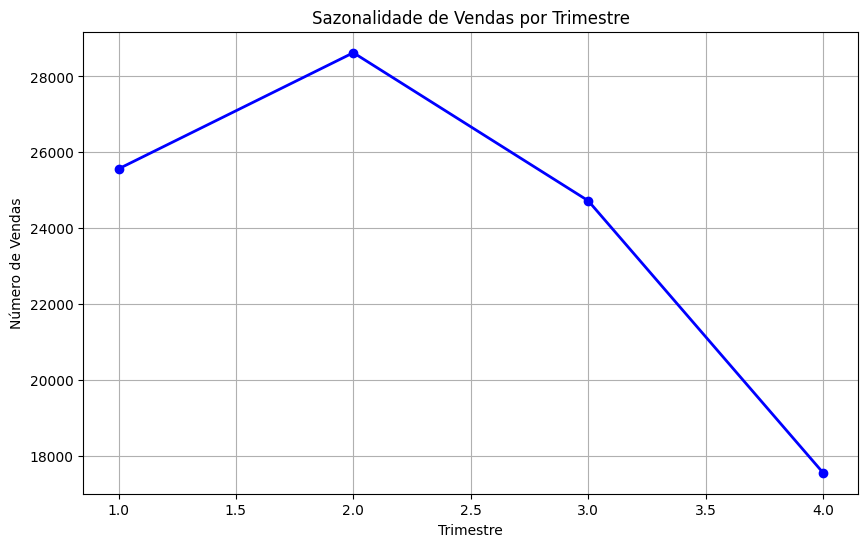

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import quarter
import matplotlib.pyplot as plt

# Inicializar a sessão do Spark
spark = SparkSession.builder.appName("AnaliseSazonalidade").getOrCreate()

# Carregar o arquivo CSV de pedidos como um DataFrame Spark
orders = spark.read.csv('t_olist_orders_dataset.csv', header=True, inferSchema=True)

# Converter a coluna 'order_purchase_timestamp' para o tipo de data
orders = orders.withColumn('order_purchase_timestamp_date', orders['order_purchase_timestamp_date'].cast('timestamp'))

# Extrair o trimestre a partir da coluna 'order_purchase_timestamp'
orders = orders.withColumn('order_trimester', quarter('order_purchase_timestamp_date'))

# Agrupar as vendas por trimestre e calcular a contagem
trimester_sales = orders.groupBy('order_trimester').count().orderBy('order_trimester')

# Coletar os resultados para exibir a série temporal da sazonalidade das vendas
sales_data = trimester_sales.collect()
trimesters = [row['order_trimester'] for row in sales_data]
sales_count = [row['count'] for row in sales_data]

# Exibir a série temporal da sazonalidade das vendas
print(list(zip(trimesters, sales_count)))

# Plotar o gráfico da série temporal da sazonalidade das vendas por trimestre
plt.figure(figsize=(10, 6))
plt.plot(trimesters, sales_count, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Sazonalidade de Vendas por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Número de Vendas')
plt.grid(True)
plt.show()


Agrupa as vendas por mês e calcular a contagem

Este código usa o PySpark para carregar os dados, extrair o mês da data de compra e calcular o número de vendas por mês. Em seguida, ele exibe a série temporal da sazonalidade das vendas usando um gráfico de linha.

[(1, 7817), (2, 8197), (3, 9549), (4, 9101), (5, 10294), (6, 9231), (7, 10028), (8, 10544), (9, 4150), (10, 4748), (11, 7288), (12, 5514)]


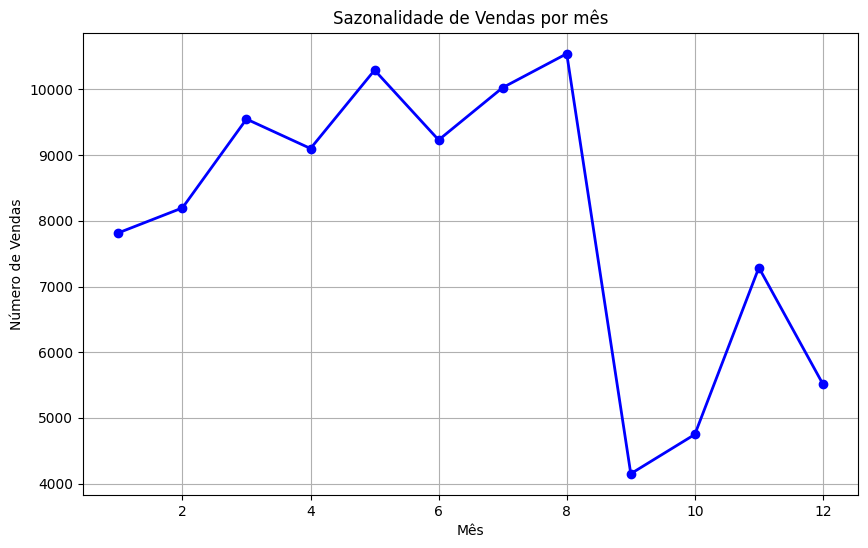

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, year, month, count
import matplotlib.pyplot as plt

# Inicializar a sessão do Spark
spark = SparkSession.builder.appName("AnaliseSazonalidade").getOrCreate()

# Carregar o arquivo CSV de pedidos como um DataFrame Spark
orders = spark.read.csv('t_olist_orders_dataset.csv', header=True, inferSchema=True)

# Converter a coluna 'order_purchase_timestamp' para o tipo de data
orders = orders.withColumn('order_purchase_timestamp_date', orders['order_purchase_timestamp_date'].cast('timestamp'))

# Extrair o mês a partir da coluna 'order_purchase_timestamp'
orders = orders.withColumn('order_month', month('order_purchase_timestamp_date'))

# Agrupar as vendas por mês e calcular a contagem
monthly_sales = orders.groupBy('order_month').agg(count('*').alias('count')).orderBy('order_month')

# Coletar os resultados para exibir a série temporal da sazonalidade das vendas
sales_data = monthly_sales.collect()
months = [row['order_month'] for row in sales_data]
sales_count = [row['count'] for row in sales_data]

# Exibir a série temporal da sazonalidade das vendas
print(list(zip(months, sales_count)))

# Plotar a sazonalidade das vendas
plt.figure(figsize=(10, 6))
plt.plot(months, sales_count, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Sazonalidade de Vendas por mês')
plt.xlabel('Mês')
plt.ylabel('Número de Vendas')
plt.grid(True)
plt.show()

Mesclando os DataFrames "t_olist_orders_dataset.csv" e "t_olist_order_payments_dataset.csv" usando a coluna "order_id" como chave de mesclagem.

Carregando os DataFrames e realizando a mesclagem.

In [ ]:
from pyspark.sql import SparkSession

# Inicializar a sessão do Spark
spark = SparkSession.builder.appName("MergeDatasets").getOrCreate()

# Carregar os arquivos CSV como DataFrames Spark
orders = spark.read.csv('t_olist_orders_dataset.csv', header=True, inferSchema=True)
order_payments = spark.read.csv('t_olist_order_payments_dataset.csv', header=True, inferSchema=True)

# Mesclar os DataFrames usando a coluna 'order_id' como chave de mesclagem
merged_df = orders.join(order_payments, 'order_id', 'inner')


Exibe a sazonalidade de vendas por hora usando um gráfico de linha

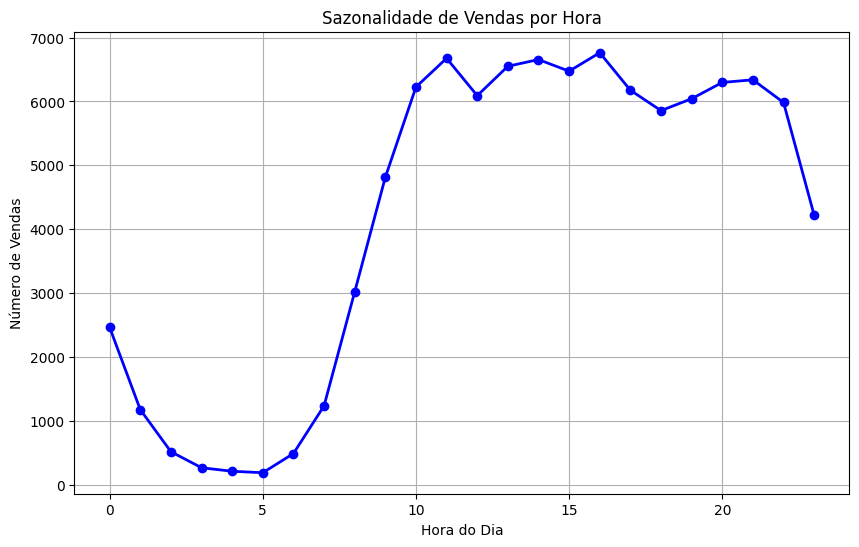

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, hour
import matplotlib.pyplot as plt

# Inicializar a sessão do Spark
spark = SparkSession.builder.appName("SazonalidadeVendas").getOrCreate()

# Supondo que 'merged_df' seja um DataFrame Spark
# Converter a coluna 'order_purchase_timestamp_hour' para timestamp
merged_df = merged_df.withColumn('order_purchase_timestamp_hour', merged_df['order_purchase_timestamp_hour'].cast('timestamp'))

# Extrair a hora da coluna 'order_purchase_timestamp_hour'
merged_df = merged_df.withColumn('order_purchase_hour', hour('order_purchase_timestamp_hour'))

# Contar as vendas por hora
hourly_sales = merged_df.groupBy('order_purchase_hour').count().orderBy('order_purchase_hour')

# Coletar os resultados para plotar a sazonalidade de vendas por hora
sales_data = hourly_sales.collect()
hours = [row['order_purchase_hour'] for row in sales_data]
sales_count = [row['count'] for row in sales_data]

# Plotar a sazonalidade de vendas por hora
plt.figure(figsize=(10, 6))
plt.plot(hours, sales_count, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Sazonalidade de Vendas por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Vendas')
plt.grid(True)
plt.show()


Criação do DataFrame "c_compras_clientes.csv"

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Inicializar a sessão do Spark
spark = SparkSession.builder.appName("MergeCSV").getOrCreate()

# Carregar os arquivos CSV para os DataFrames Spark correspondentes
df_olist_orders = spark.read.csv('t_olist_orders_dataset.csv', header=True, inferSchema=True)
df_order_items = spark.read.csv('csv_olist_order_items_dataset.csv', header=True, inferSchema=True)

# Fundir os DataFrames usando a coluna 'product_id' como chave
df_merged = df_olist_orders.join(df_order_items.select('order_id', 'product_id'), 'order_id', 'left')

# Salvar o novo DataFrame em um arquivo CSV
df_merged.write.csv('c_compras_clientes.csv', header=True, mode='overwrite')

Este código carrega os DataFrames "customers_products.csv" e "olist_products_dataset.csv", adiciona os dados da coluna "product_id" do DataFrame "olist_products_dataset.csv" e, em seguida, salva o resultado em um novo arquivo chamado "customers_products_with_product_id.csv".

Criação da "customers_products_with_product_id.csv" para realizar a junção com "c_compras_clientes.csv" e "olist_products_dataset.csv"

In [ ]:
from pyspark.sql import SparkSession

# Inicializar a sessão do Spark
spark = SparkSession.builder.appName("MergeCSV").getOrCreate()

# Carregar os DataFrames Spark correspondentes aos arquivos CSV
customers_products_df = spark.read.csv('csv_olist_customers_dataset.csv', header=True, inferSchema=True)
products_df = spark.read.csv('olist_products_dataset.csv', header=True, inferSchema=True)

# Selecionar a coluna 'product_id' do DataFrame 'products_df'
products_id = products_df.select('product_id')

# Adicionar a coluna 'product_id' ao DataFrame 'customers_products_df'
customers_products_with_id_df = customers_products_df.crossJoin(products_id)

# Salvar o resultado em um novo arquivo CSV
customers_products_with_id_df.write.csv('c_customers_products_with_product_id.csv', header=True, mode='overwrite')


Junção "c_compras_clientes.csv", "c_customers_products_with_product_id.csv" e "olist_products_dataset.csv".

In [ ]:
from pyspark.sql import SparkSession

# Inicializar a sessão do Spark
spark = SparkSession.builder.appName("MergeDataFrames").getOrCreate()

# Carregar os DataFrames Spark correspondentes aos arquivos CSV
compras_df = spark.read.csv('c_compras_clientes.csv', header=True, inferSchema=True)
customers_products_df = spark.read.csv('c_customers_products_with_product_id.csv', header=True, inferSchema=True)
products_df = spark.read.csv('olist_products_dataset.csv', header=True, inferSchema=True)

# Realizar a junção dos DataFrames usando a coluna 'product_id' como chave
merged_df = compras_df.join(customers_products_df, 'product_id', 'inner').join(products_df, 'product_id', 'inner')

# Salvar o resultado em um novo arquivo CSV
merged_df.write.csv('c_customers_compras_products.csv', header=True, mode='overwrite')


Exibe as primeiras linhas do DataFrame "customers_compras_products.csv" em um formato de tabela estruturada.

In [ ]:
from pyspark.sql import SparkSession

# Inicializar a sessão do Spark
spark = SparkSession.builder.appName("DisplayDataFrame").getOrCreate()

# Carregar o DataFrame Spark a partir do arquivo CSV
merged_df = spark.read.csv('c_customers_compras_products.csv', header=True, inferSchema=True)

# Exibir as primeiras linhas do DataFrame em formato de tabela
merged_df.show(5)  # Mostra as primeiras 5 linhas do DataFrame
